###  Importar as Bibliotecas Necessárias

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carregar o Dataset

In [105]:
url = 'https://raw.githubusercontent.com/FelipeDev2020/Risco_de_inadimplencia/main/base_dados/german_credit_data.csv'

df = pd.read_csv(url, sep=',')

### Entendimento dos dados

##### Explorar a Estrutura do DataFrame

In [106]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


### Entender a Dimensão dos Dados

In [108]:
df.shape

(1000, 10)

### Analisar as Colunas e os Tipos de Dados

**OBS:**  a coluna Unnamed 0, eu devo retirar já que é uma coluna de indexação porém desnecessario

In [109]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

**ATENÇÃO:** retirei a coluna (*Unnamed: 0*) para evitar mais trabalho futuramente

In [110]:
df = df.drop(columns=['Unnamed: 0'])

In [111]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

### Descrever as Estatísticas Básicas

Verificando os valores numéricos

In [112]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Obviamente vamos verificar os valores categóricos

In [113]:
df.describe(include=[object])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


Verificando os valores nulos

In [114]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### Verificar Distribuições de Valores

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>]], dtype=object)

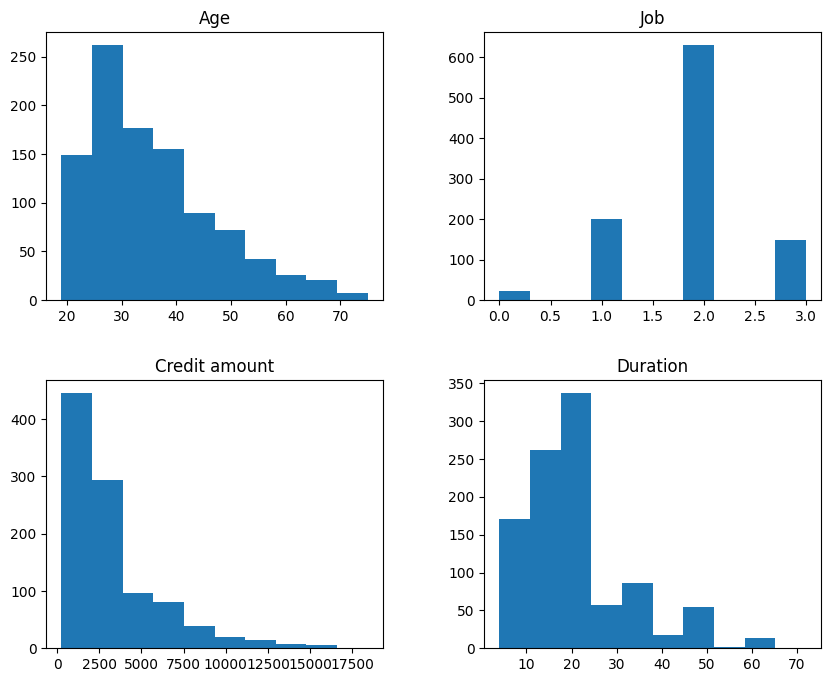

In [115]:
df.hist(figsize=(10, 8), grid=(False))

In [116]:
df['Sex'].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [117]:
df['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [118]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [119]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [120]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

### Identificar e Tratar Outliers

<Axes: xlabel='Credit amount'>

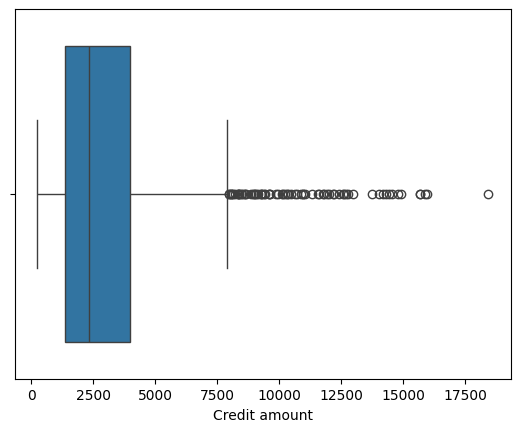

In [121]:
sns.boxplot(data=df, x='Credit amount')

### Analisar a Correlação entre Variáveis

Matriz de correlação:

In [122]:
df.corr

<bound method DataFrame.corr of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576

Heatmap da correlação:

Tive que retirar as colunas que não eram numéricas para calcular e plotar a correlação

In [128]:
df_fill = df.fillna(0)
df_fill = df_fill.select_dtypes(include=[np.number])

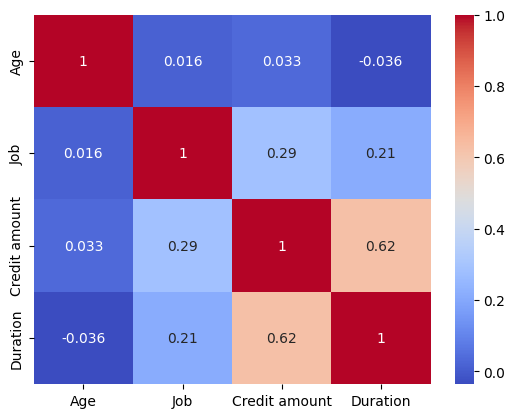

In [129]:
sns.heatmap(df_fill.corr(), annot=True, cmap='coolwarm')
plt.show()

### Verificando a Distribuição da coluna Idade

<Axes: xlabel='Age', ylabel='count'>

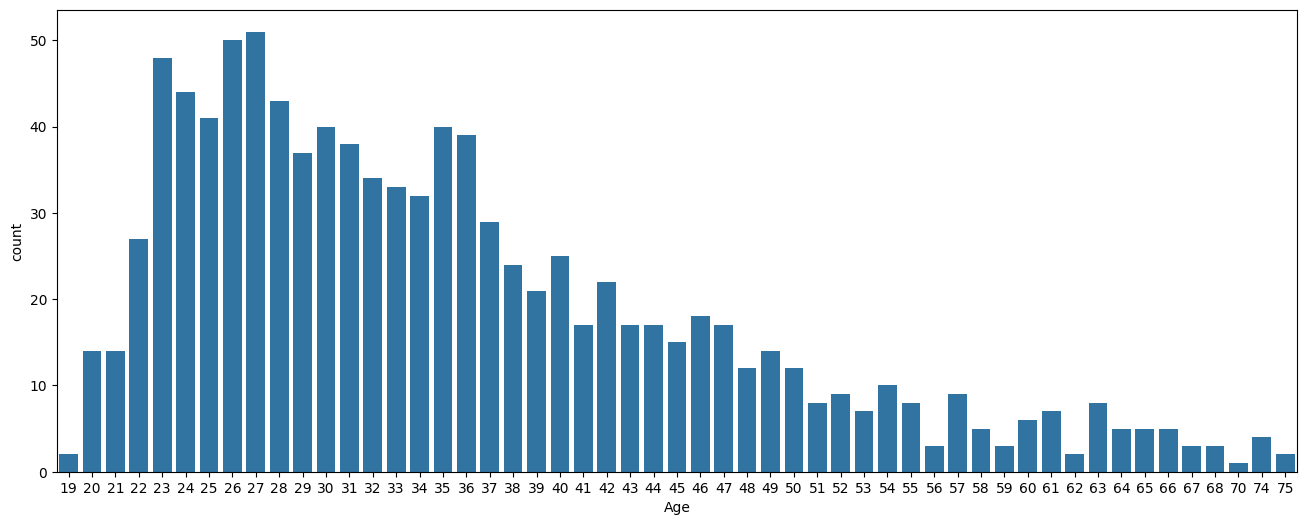

In [147]:
plt.figure(figsize=(16, 6))
sns.countplot(df, x='Age')